# Part I - PROSPECT LOAN DATA
## by Haron Nyamai Wambua

## Introduction
> This dataset consists 113,937 rows  and 81 columns giving information on loans provided. The columns or features include:loan amount, borrower rate (or interest rate), current loan status, borrower income, and many other features relating to loans. The dataset information can be found [Dataset information](https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0)


## Table of contents:

### CONTENT
- [Preliminary data wrangling](#Preliminary-wrangling)
- [Univariate Data Exploration](#Univariate-Exploration)
- [Bivariate Data Exploration](#Bivariate-Exploration)
- [Multivariate Data Exploration](#Multivariate-Exploration)


## Preliminary Data Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Loading loans dataset in a pandas dataframe
loans=pd.read_csv('prosperLoanData.csv')
#pd.set_option('dispaly.max_cols',None)
loans.head().T

0  \
ListingKey                         1021339766868145413AB3B   
ListingNumber                                       193129   
ListingCreationDate          2007-08-26 19:09:29.263000000   
CreditGrade                                              C   
Term                                                    36   
...                                                    ...   
PercentFunded                                          1.0   
Recommendations                                          0   
InvestmentFromFriendsCount                               0   
InvestmentFromFriendsAmount                            0.0   
Investors                                              258   

                                                         1  \
ListingKey                         10273602499503308B223C1   
ListingNumber                                      1209647   
ListingCreationDate          2014-02-27 08:28:07.900000000   
CreditGrade                                            NaN   
Term                                                    36   
...                                                    ...   
PercentFunded                                          1.0   
Recommendations                                          0   
InvestmentFromFriendsCount                               0   
InvestmentFromFriendsAmount                            0.0   
Investors                                                1   

                                                         2  \
ListingKey                         0EE9337825851032864889A   
ListingNumber                                        81716   
ListingCreationDate          2007-01-05 15:00:47.090000000   
CreditGrade                                             HR   
Term                                                    36   
...                                                    ...   
PercentFunded                                          1.0   
Recommendations                                          0   
InvestmentFromFriendsCount                               0   
InvestmentFromFriendsAmount                            0.0   
Investors                                               41   

                                                         3  \
ListingKey                         0EF5356002482715299901A   
ListingNumber                                       658116   
ListingCreationDate          2012-10-22 11:02:35.010000000   
CreditGrade                                            NaN   
Term                                                    36   
...                                                    ...   
PercentFunded                                          1.0   
Recommendations                                          0   
InvestmentFromFriendsCount                               0   
InvestmentFromFriendsAmount                            0.0   
Investors                                              158   

                                                         4  
ListingKey                         0F023589499656230C5E3E2  
ListingNumber                                       909464  
ListingCreationDate          2013-09-14 18:38:39.097000000  
CreditGrade                                            NaN  
Term                                                    36  
...                                                    ...  
PercentFunded                                          1.0  
Recommendations                                          0  
InvestmentFromFriendsCount                               0  
InvestmentFromFriendsAmount                            0.0  
Investors                                               20  

[81 rows x 5 columns]

### Basic Checks

In [3]:
#Shape of the dataset
loans.shape

(113937, 81)

In [4]:
# basic information
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
# Checking the missing values
pd.set_option('display.max_rows',None)
loans.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [6]:
# Checkig for duplicates
loans.duplicated().sum()

0

### Insights from basic checks.
+ There are 113,937 rows and 81 columns in this dataset.
+ Listingcreationdate,ClosedDate, LoanOriginalDate is object instead of datetime.
+ CreditGrade,ClosedDate,GroupKey,TotalProsperLoans, TotalProsperPaymentBilled,OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing have above 50,000 missing values.
+ Columns have mixed upper and lower cases. Some columns have spaces in their characters which may not be good during analysis. Hence they may need to be worked on.
+ There seems to be no duplicates in the dataset. 

### Stucture of the dataset.

> 113,937 loans with 81 features about the loans.

### Target Feature in the analysis.

> Borrowerrate

### Features to support the analysis.

> Loanstatus, ProsperRating (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentstatusDuration, IsBorrowerHomeOwner, CurrentlyInGroup, CurrentCreditLines, TotalInquiries, TotalTrades, IncomeRange, DebtToIncomeRatio, LoanOriginalAmount, LoanOriginalDate, Investors.
### Domain Analysis of the selected features
1. **BorrowerRate**: The Borrower's interest rate for this loan. 
2. **ProsperRating (numeric)**:The  Prosper Rating assigned at the time the listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 
3. **BorrowerState**: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.
4. **Occupation**: The Occupation selected by the Borrower at the time they created the listing.
5. **EmploymentStatus**: The employment status of the borrower at the time they posted the listing.
6. **EmploymentStatusDuration**: The length in months of the employment status at the time the listing was created.
7. **IsBorrowerHomeowner** : A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide.
8. **CurrentlyInGroup**: Specifies whether or not the Borrower was in a group at the time the listing was created.
9. **CurrentCreditLines**: Number of current credit lines at the time the credit profile was pulled.
10. **TotalInquiries**: Total number of inquiries at the time the credit profile was pulled.
11. **TotalTrades**: Number of trade lines ever opened at the time the credit profile was pulled.
12. **IncomeRange**: The income range of the borrower at the time the listing was created.
13. **DebtToIncomeRatio**: The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).
14. **LoanOriginalAmount**: The origination amount of the loan.
15. **LoanOriginationDate**: The date the loan was originated.
16. **Investors**: The number of investors that funded the loan.
17. **LoanStatus**: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress 

### Possible Questions:
* What factors affect borrowerrate?
* Which states are in the dataset, and which ones have high loan application, loan interests and loan approval?
* Are there differences between loans depending on how large the original loan amount was?

In [7]:
# Creating the subframe from the main dataframe.
loan=loans[['LoanStatus','BorrowerRate','ProsperRating (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner','CurrentlyInGroup','CurrentCreditLines','TotalInquiries', 'TotalTrades', 'IncomeRange', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Investors','LoanOriginationDate']]
# Checking randomly 10 rows
loan.sample(10)

LoanStatus  BorrowerRate  ProsperRating (numeric) BorrowerState  \
75872      Current        0.0605                      7.0            CA   
97628    Completed        0.1249                      6.0            CA   
60137      Current        0.2024                      4.0            MI   
38796    Completed        0.1730                      4.0            PA   
103597   Completed        0.1990                      4.0            CA   
69199      Current        0.1899                      4.0            MA   
1058    Chargedoff        0.1358                      6.0            CA   
82754    Completed        0.0950                      NaN            TN   
72735      Current        0.0924                      6.0            LA   
2755     Defaulted        0.2699                      3.0            GA   

                  Occupation EmploymentStatus  EmploymentStatusDuration  \
75872           Professional         Employed                      86.0   
97628                  Other         Employed                     147.0   
60137           Professional         Employed                      10.0   
38796                  Other         Employed                      41.0   
103597  Tradesman - Mechanic        Full-time                      77.0   
69199           Professional         Employed                      49.0   
1058            Professional        Full-time                      23.0   
82754              Executive    Not available                       NaN   
72735          Skilled Labor         Employed                     191.0   
2755                   Other         Employed                      96.0   

        IsBorrowerHomeowner  CurrentlyInGroup  CurrentCreditLines  \
75872                  True             False                17.0   
97628                 False             False                19.0   
60137                 False             False                13.0   
38796                 False             False                 8.0   
103597                False             False                 8.0   
69199                  True             False                12.0   
1058                   True             False                19.0   
82754                  True              True                 NaN   
72735                  True             False                 7.0   
2755                  False             False                 8.0   

        TotalInquiries  TotalTrades     IncomeRange  DebtToIncomeRatio  \
75872              6.0         35.0       $100,000+               0.06   
97628              5.0         28.0  $50,000-74,999               0.23   
60137              7.0         23.0       $100,000+               0.35   
38796              2.0         36.0  $50,000-74,999               0.33   
103597             1.0          9.0  $25,000-49,999               0.38   
69199              2.0         35.0       $100,000+               0.13   
1058              12.0         31.0       $100,000+               0.29   
82754             17.0          NaN   Not displayed               0.00   
72735              2.0         13.0  $50,000-74,999               0.07   
2755               0.0         14.0  $25,000-49,999               0.27   

        LoanOriginalAmount  Investors  LoanOriginationDate  
75872                10000          1  2013-12-27 00:00:00  
97628                 2000          1  2013-11-07 00:00:00  
60137                11000        169  2013-05-28 00:00:00  
38796                15000         75  2013-09-17 00:00:00  
103597                3000         66  2010-06-23 00:00:00  
69199                 5000          1  2013-05-17 00:00:00  
1058                  4500        194  2009-09-30 00:00:00  
82754                 1000         12  2006-08-29 00:00:00  
72735                 5000         58  2012-10-24 00:00:00  
2755                  7000        141  2011-09-20 00:00:00

In [8]:
loan.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [9]:
# Checking missing values in the data
loan.isnull().sum()

LoanStatus                      0
BorrowerRate                    0
ProsperRating (numeric)     29084
BorrowerState                5515
Occupation                   3588
EmploymentStatus             2255
EmploymentStatusDuration     7625
IsBorrowerHomeowner             0
CurrentlyInGroup                0
CurrentCreditLines           7604
TotalInquiries               1159
TotalTrades                  7544
IncomeRange                     0
DebtToIncomeRatio            8554
LoanOriginalAmount              0
Investors                       0
LoanOriginationDate             0
dtype: int64

In [10]:
# Description of the numerical columns
loan.describe()

BorrowerRate  ProsperRating (numeric)  EmploymentStatusDuration  \
count  113937.000000             84853.000000             106312.000000   
mean        0.192764                 4.072243                 96.071582   
std         0.074818                 1.673227                 94.480605   
min         0.000000                 1.000000                  0.000000   
25%         0.134000                 3.000000                 26.000000   
50%         0.184000                 4.000000                 67.000000   
75%         0.250000                 5.000000                137.000000   
max         0.497500                 7.000000                755.000000   

       CurrentCreditLines  TotalInquiries    TotalTrades  DebtToIncomeRatio  \
count       106333.000000   112778.000000  106393.000000      105383.000000   
mean            10.317192        5.584405      23.230034           0.275947   
std              5.457866        6.429946      11.871311           0.551759   
min              0.000000        0.000000       0.000000           0.000000   
25%              7.000000        2.000000      15.000000           0.140000   
50%             10.000000        4.000000      22.000000           0.220000   
75%             13.000000        7.000000      30.000000           0.320000   
max             59.000000      379.000000     126.000000          10.010000   

       LoanOriginalAmount      Investors  
count        113937.00000  113937.000000  
mean           8337.01385      80.475228  
std            6245.80058     103.239020  
min            1000.00000       1.000000  
25%            4000.00000       2.000000  
50%            6500.00000      44.000000  
75%           12000.00000     115.000000  
max           35000.00000    1189.000000

In [11]:
# Basic Information
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   LoanStatus                113937 non-null  object 
 1   BorrowerRate              113937 non-null  float64
 2   ProsperRating (numeric)   84853 non-null   float64
 3   BorrowerState             108422 non-null  object 
 4   Occupation                110349 non-null  object 
 5   EmploymentStatus          111682 non-null  object 
 6   EmploymentStatusDuration  106312 non-null  float64
 7   IsBorrowerHomeowner       113937 non-null  bool   
 8   CurrentlyInGroup          113937 non-null  bool   
 9   CurrentCreditLines        106333 non-null  float64
 10  TotalInquiries            112778 non-null  float64
 11  TotalTrades               106393 non-null  float64
 12  IncomeRange               113937 non-null  object 
 13  DebtToIncomeRatio         105383 non-null  f

### Insights from our sub dataframe.
+ The column names need to be changed to lowercase, with no gaps as well as short for easy analysis.
+ LoanOriginationDate needs to be parsed into datetime.
+ ProsperRating (numeric) has the highest number of missing values. 

In [12]:
loan['ProsperRating (numeric)'].value_counts()

4.0    18345
5.0    15581
6.0    14551
3.0    14274
2.0     9795
1.0     6935
7.0     5372
Name: ProsperRating (numeric), dtype: int64

### Cleaning the data.

In [13]:
# Removing the space and converting into lowercase
loan.columns=loan.columns.str.strip().str.lower()

In [14]:
# Renaming the columns
loan.rename(columns={'prosperrating (numeric)':'pro_rating',
      'employmentstatusduration':'employmentduration'},inplace=True)

In [15]:
loan.head().T

0                    1  \
loanstatus                     Completed              Current   
borrowerrate                       0.158                0.092   
pro_rating                           NaN                  6.0   
borrowerstate                         CO                   CO   
occupation                         Other         Professional   
employmentstatus           Self-employed             Employed   
employmentduration                   2.0                 44.0   
isborrowerhomeowner                 True                False   
currentlyingroup                    True                False   
currentcreditlines                   5.0                 14.0   
totalinquiries                       3.0                  5.0   
totaltrades                         11.0                 29.0   
incomerange               $25,000-49,999       $50,000-74,999   
debttoincomeratio                   0.17                 0.18   
loanoriginalamount                  9425                10000   
investors                            258                    1   
loanoriginationdate  2007-09-12 00:00:00  2014-03-03 00:00:00   

                                       2                    3  \
loanstatus                     Completed              Current   
borrowerrate                       0.275               0.0974   
pro_rating                           NaN                  6.0   
borrowerstate                         GA                   GA   
occupation                         Other        Skilled Labor   
employmentstatus           Not available             Employed   
employmentduration                   NaN                113.0   
isborrowerhomeowner                False                 True   
currentlyingroup                    True                False   
currentcreditlines                   NaN                  5.0   
totalinquiries                       1.0                  1.0   
totaltrades                          NaN                 26.0   
incomerange                Not displayed       $25,000-49,999   
debttoincomeratio                   0.06                 0.15   
loanoriginalamount                  3001                10000   
investors                             41                  158   
loanoriginationdate  2007-01-17 00:00:00  2012-11-01 00:00:00   

                                       4  
loanstatus                       Current  
borrowerrate                      0.2085  
pro_rating                           3.0  
borrowerstate                         MN  
occupation                     Executive  
employmentstatus                Employed  
employmentduration                  44.0  
isborrowerhomeowner                 True  
currentlyingroup                   False  
currentcreditlines                  19.0  
totalinquiries                       9.0  
totaltrades                         39.0  
incomerange                    $100,000+  
debttoincomeratio                   0.26  
loanoriginalamount                 15000  
investors                             20  
loanoriginationdate  2013-09-20 00:00:00

### Dealing with dates

In [16]:
# Converting loanoriginationdate to datetime
loan.loanoriginationdate=pd.to_datetime(loan.loanoriginationdate)

### Dealing with categorical columns 

In [17]:
loan.incomerange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: incomerange, dtype: int64

In [18]:
# ordinal categorical columns
ordinal_columns={'pro_rating':[1,2,3,4,5,6,7],
                'incomerange':['Not displayed','Not employed','$0',
                              '$1-24,999','$25,000-49,999','$50,000-74,999',
                              '$75,000-99,999','$100,000+']}
for item in ordinal_columns:
    ordered_column=pd.api.types.CategoricalDtype(categories=ordinal_columns[item],ordered=True)
    loan[item]=loan[item].astype(ordered_column)

In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   loanstatus           113937 non-null  object        
 1   borrowerrate         113937 non-null  float64       
 2   pro_rating           84853 non-null   category      
 3   borrowerstate        108422 non-null  object        
 4   occupation           110349 non-null  object        
 5   employmentstatus     111682 non-null  object        
 6   employmentduration   106312 non-null  float64       
 7   isborrowerhomeowner  113937 non-null  bool          
 8   currentlyingroup     113937 non-null  bool          
 9   currentcreditlines   106333 non-null  float64       
 10  totalinquiries       112778 non-null  float64       
 11  totaltrades          106393 non-null  float64       
 12  incomerange          113937 non-null  category      
 13  debttoincomera

The data is transformed ready for exploration and explanation stage. We can save it in a form of csv

In [20]:
loan.to_csv('transformedloansdata',index=False)

# Data Analysis
### Loading the preprocessed data.

In [21]:
data=pd.read_csv('transformedloansdata')
data.head()

loanstatus  borrowerrate  pro_rating borrowerstate     occupation  \
0  Completed        0.1580         NaN            CO          Other   
1    Current        0.0920         6.0            CO   Professional   
2  Completed        0.2750         NaN            GA          Other   
3    Current        0.0974         6.0            GA  Skilled Labor   
4    Current        0.2085         3.0            MN      Executive   

  employmentstatus  employmentduration  isborrowerhomeowner  currentlyingroup  \
0    Self-employed                 2.0                 True              True   
1         Employed                44.0                False             False   
2    Not available                 NaN                False              True   
3         Employed               113.0                 True             False   
4         Employed                44.0                 True             False   

   currentcreditlines  totalinquiries  totaltrades     incomerange  \
0                 5.0             3.0         11.0  $25,000-49,999   
1                14.0             5.0         29.0  $50,000-74,999   
2                 NaN             1.0          NaN   Not displayed   
3                 5.0             1.0         26.0  $25,000-49,999   
4                19.0             9.0         39.0       $100,000+   

   debttoincomeratio  loanoriginalamount  investors loanoriginationdate  
0               0.17                9425        258          2007-09-12  
1               0.18               10000          1          2014-03-03  
2               0.06                3001         41          2007-01-17  
3               0.15               10000        158          2012-11-01  
4               0.26               15000         20          2013-09-20

## Univariate Exploration
> In this section, distributions of individual variables were investigated.

### Question 1: What is the distribution of numeric columns (features)

In [22]:
num_columns=['borrowerrate','employmentduration','totaltrades','loanoriginalamount','investors','currentcreditlines','debttoincomeratio','totalinquiries']

In [23]:
# A function to plot histograms 
def hist_plot(df,col,bins):
    """Plotting histograms for univariate analysis"""
    plot=sb.histplot(data=df,x=col, bins=bins,kde=False)
    plt.ylabel('Counts')
    plt.title('Distribution of {}'.format(col))
    return plot

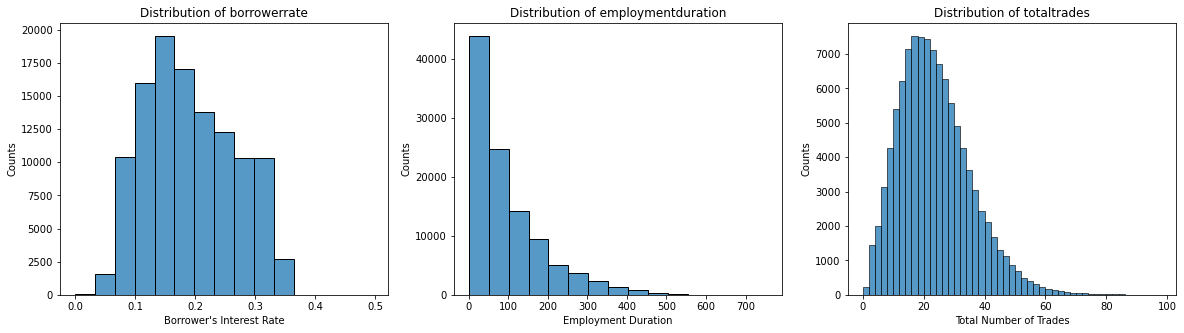

In [24]:
# Checking the disribution of the interest rate, employment duration and total trades
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
hist_plot(data,'borrowerrate',15)
plt.xlabel('Borrower\'s Interest Rate');
# PLoting for employmentduration 
plt.subplot(1,3,2)
hist_plot(data,'employmentduration',15)
plt.xlabel('Employment Duration');
# PLoting fortotaltrades 
plt.subplot(1,3,3)
bins1=np.arange(0,100,2)
hist_plot(data,'totaltrades',bins=bins1)
plt.xlabel('Total Number of Trades');

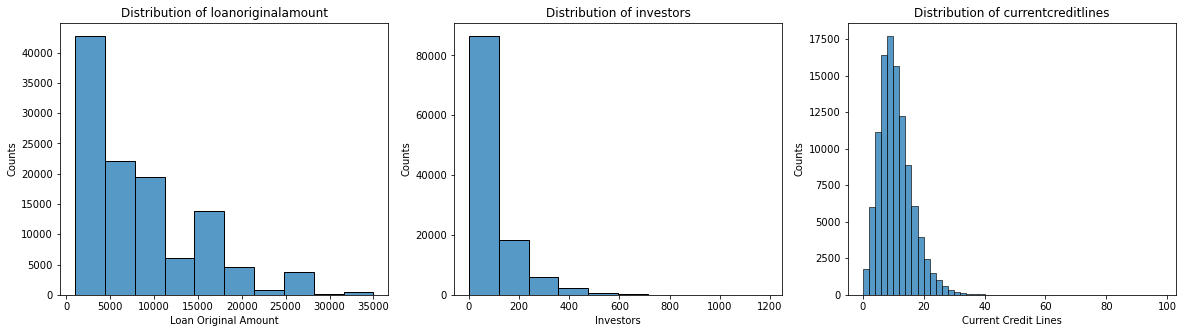

In [25]:
# Checking the disribution of the loanoriginalamount, investors and currentcreditlines
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
hist_plot(data,'loanoriginalamount',10)
plt.xlabel('Loan Original Amount');
# PLoting for 
plt.subplot(1,3,2)
hist_plot(data,'investors',10)
plt.xlabel('Investors');
# PLoting for 
plt.subplot(1,3,3)
bins1=np.arange(0,100,2)
hist_plot(data,'currentcreditlines',bins=bins1)
plt.xlabel('Current Credit Lines');

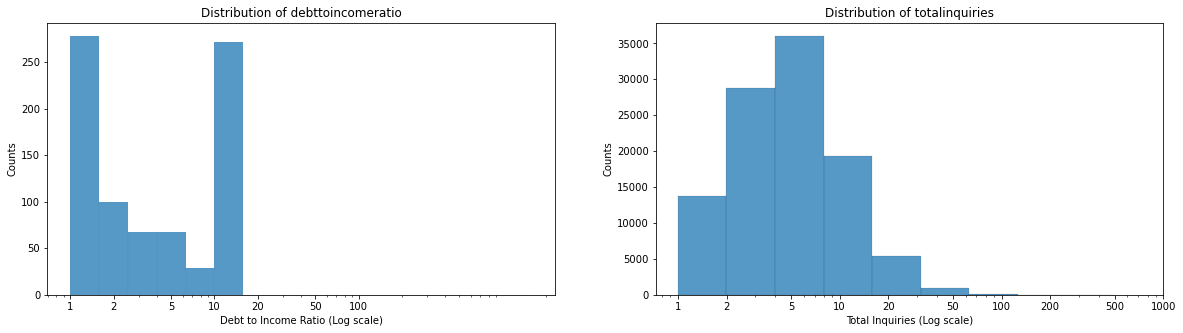

In [26]:
# Checking the disribution of the columns that need transformation i.e debttoincomeratio and totalinquiries.
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
bins1=10**np.arange(0,3.3,0.2)
hist_plot(data,'debttoincomeratio',bins=bins1)
plt.xscale('log')
ticks=[1,2,5,10,20,50,100]
labels=['{}'.format(num) for num in ticks]
plt.xticks(ticks=ticks,labels=labels)
plt.xlabel('Debt to Income Ratio (Log scale)');
# PLoting for total inquiries 
plt.subplot(1,2,2)
bins1=10**np.arange(0,3,.3)
hist_plot(data,'totalinquiries',bins=bins1)
plt.xscale('log')
ticks=[1,2,5,10,20,50,100,200,500,1000]
labels=['{}'.format(num) for num in ticks]
plt.xticks(ticks=ticks,labels=labels)
plt.xlabel('Total Inquiries (Log scale)');

### Insights from the histograms of numeric features
+ **The borrower's interest rate** shows a normal distribution  with a slight positive skew. The majority of loan rates are between 0.1 to 0.2 where we see the peak.
+ **Employment duration** is positively skewed with a decrease in the count of employees as the number of months for the employee increases. Many employees are less than 100 months employed at the time the listing was created.
+ **Total number of trades** are normally distributed with a positive skew. Between 10 and 30 we have th highest number of trades.
+ **Loan original amount** is a unimodal normal distribution and it is positively skewed.
+ **Current credit lines** is slightly skewed positively. The two peaks are at less than 2 and above 10. However, there seems to be outliers in the distribution especially those above 10, since the trend seems to be decreasing from 0 to 9. This may need an investigation in the bivariate analysis using box plot
+ **Debt to income ratio** shows a bimodal nature after transformation of the scale to a logarithic scale. 
+ **Total Inquiries** when a normal histogram with the default bins is plotted, the plot isn't informative due to the presence of outliers. However, after using different bins and transforming the x-axis scale to a logarithmic one, the issue is solved and we can see that the distribution follows a normal distribution with a slight positive skew. The number of persons making inqueries decrease with increase in the number total inqueries. This means that many people didn't make a lot of inquiries (made less than a total of 15 inquiries) during the creation of the list.




### Question 2: What is the distribution for the categorical columns.

In [27]:
#Selecting categorical columns.
cat_cols=['loanstatus','pro_rating','borrowerstate','occupation','employmentstatus','isborrowerhomeowner','currentlyingroup','incomerange'] 

In [28]:
# A function that plots a countplot of a given feature.
def bar_plot(df,column,order,x,y):
    plt.figure(figsize=(x,y))
    color=sb.color_palette()[0]
    plot=sb.countplot(data=df,x=column,order=order,color=color)
    plt.title('Distribution of {}.'.format(column))
    plt.ylabel('{} count.'.format(column))
    return plot

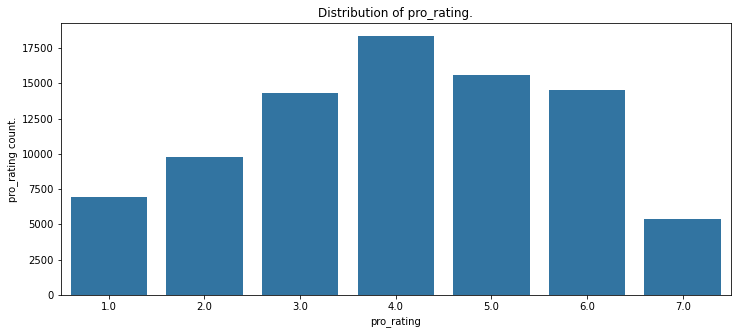

In [29]:
# Plotting for the prosper ratings
bar_plot(data,'pro_rating',None,12,5);

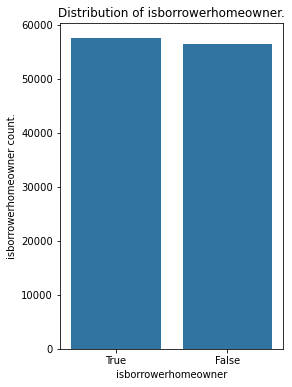

In [30]:
# Plotting for the isborrowerhomeowner
home_order=data.isborrowerhomeowner.value_counts().index
bar_plot(data,'isborrowerhomeowner',home_order,4,6);

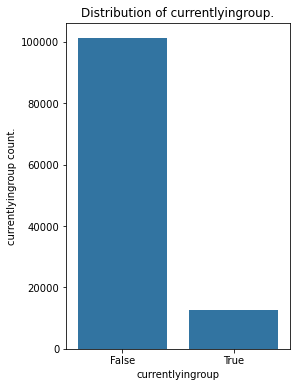

In [31]:
# Plotting for the currentlyingroup
bar_plot(data,'currentlyingroup',None,4,6);

In [32]:
# A function that plots relative proportions of a given feature
def rel_count_plot(df,column,order,x_size,y_size):
    """Plotting a count plot to display proportions of the items in a given column"""
    # Ordering the plot
    order=df[column].value_counts().index
    # Set figsize and ploting the count plot
    plt.figure(figsize=(x_size,y_size))
    plot=sb.countplot(data=df,y=column,order=order,color='b')
    plt.title('Distribution of {}.'.format(column))
    plt.xlabel('{} count.'.format(column))
    # annotating the figure by using our current labelling and locations.
    total_count=df.shape[0]
    column_count=df[column].value_counts()
    locs,labels=plt.yticks()
    # Loop through the pairs of the current location and labels
    for loc,label in zip(locs,labels):
        count=column_count[label.get_text()]
        pct_string='{:0.2f}%'.format(count/total_count*100)
    # Printing the percentage value on the tip of each bar.     
        plt.text(count+500,loc,pct_string,va='center',color='red')      
    return plot

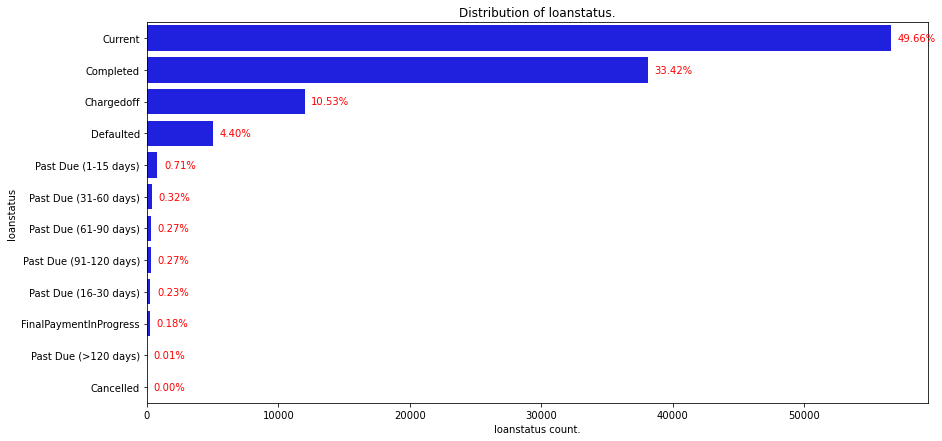

In [33]:
# Plotting countpot for the loanstatus
rel_count_plot(data,'loanstatus',None,14,7);

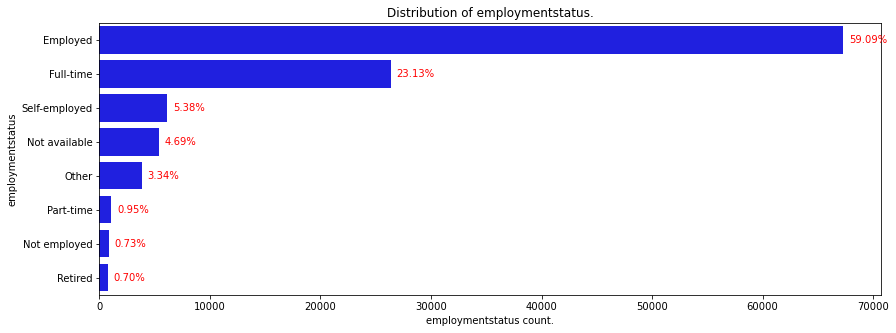

In [34]:
# Plotting for the employmentstatus
rel_count_plot(data,'employmentstatus',None,14,5);

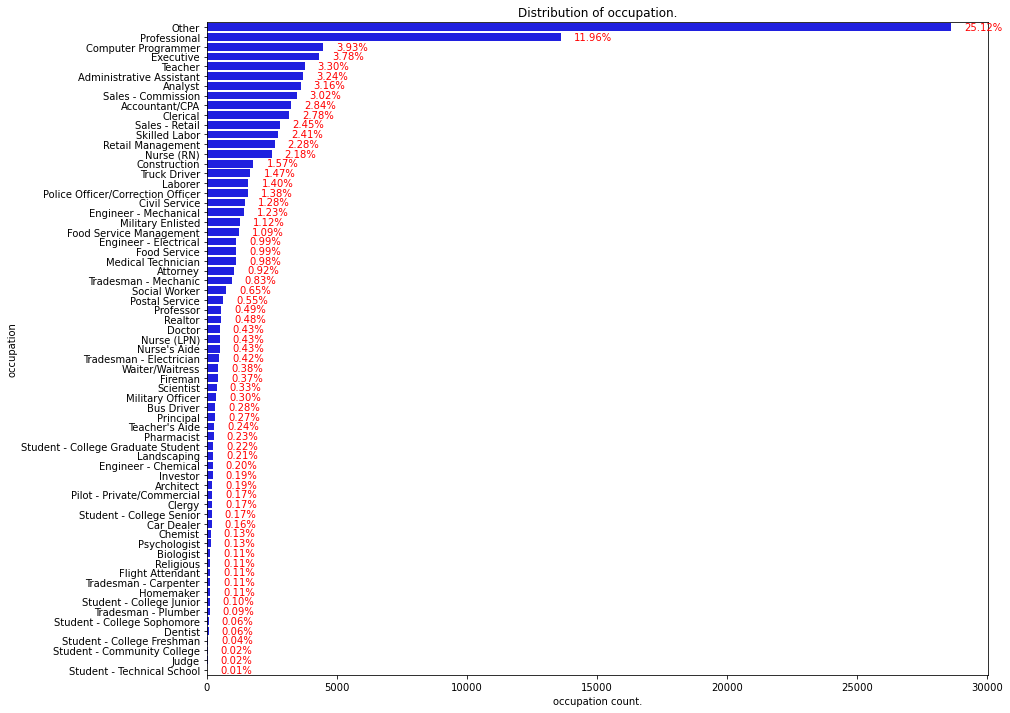

In [35]:
# Plotting countpot for occupation
rel_count_plot(data,'occupation',None,14,12);

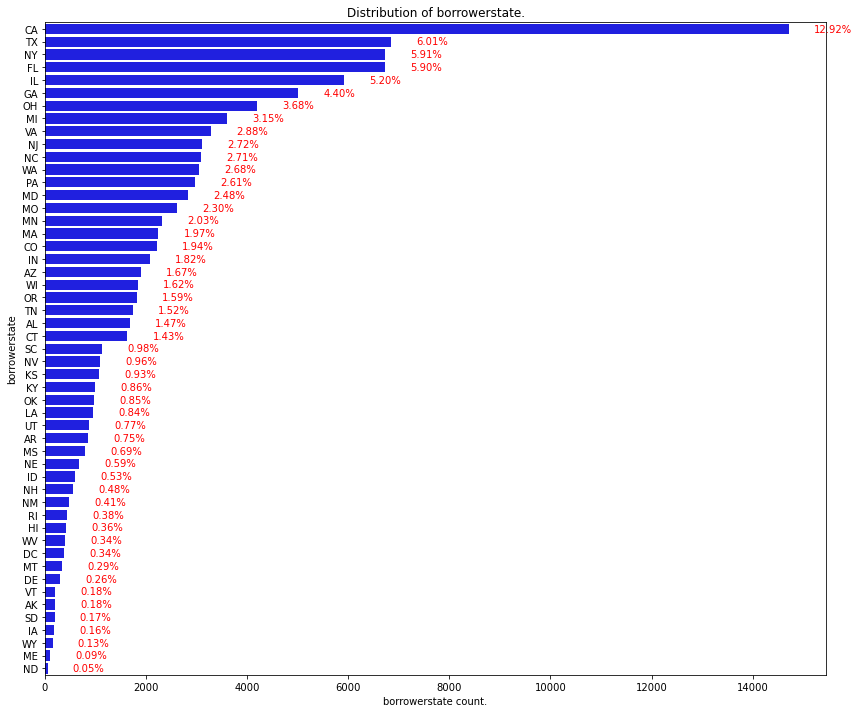

In [36]:
# Plotting countpot for the borrowerstate
rel_count_plot(data,'borrowerstate',None,14,12);

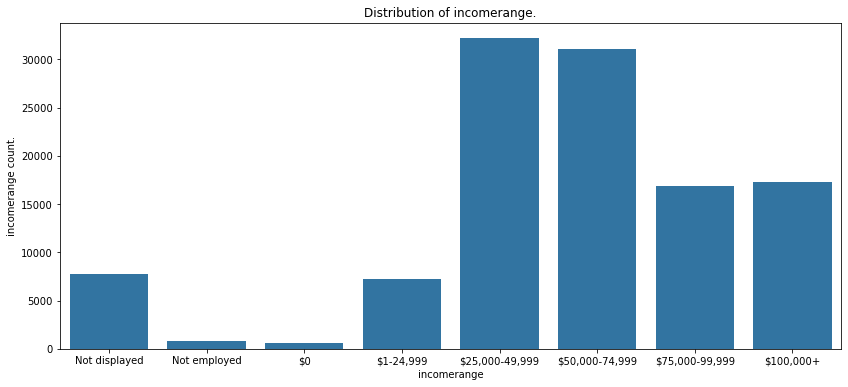

In [37]:
# Plotting countpot for the incomerange
ordered=['Not displayed','Not employed','$0',
                              '$1-24,999','$25,000-49,999','$50,000-74,999',
                              '$75,000-99,999','$100,000+']

#rel_count_plot(data,'incomerange',ordered,14,5);
bar_plot(data,'incomerange',ordered,14,6);

### Insights from counts plots (Univeriate analysis for categorical data)
+ **pro_rating:-** The rating follows a normal distribution with the peak at rating 4. 
+ **isborrowerhomeowner:-** It appears that there are more borrowers who own homes as compared to those who do'nt own, however, the diffrence is small.
+ **currentlyingroup:-** Many borrowers seem not be in a group at the time of listing creation. Only a few are currently in a group.
+ **loastatus:-** The dataset show that about 50% of the borrowers are currenlty paying the loan, 33% have completed, and 11% have their loans chargedoff. The distribution can be shown in the plot above.
+ **employmentstatus:-** The majority of the borrowers are employed as indicated in the plot showing full time, self or part time and other type of employment. 
+ **occupation:-** From the plot we see the category of others has more borrowers, however, we have a lot of missing data and hence we may not get a clear picture of the occupation that has a majority of borrowers.
+ **borrowerstate:-** California has the highest number of borrowers followed by Texas and then New York and the list goes on. This would better be understood if comparison would be made with respective state population size. 
+ **incomerange:-** There is an increasing trend from unemployed and those that earn \\$0 to those that earn between \\$50K to \\$74K and after that a decrease is witnessed.


## Bivariate Exploration

> In this section, the relationships between pairs of variables in the
data are investigated.

### Question 3: How does different features such as income range, loan amount and employment status affect the interest charged for a loan?

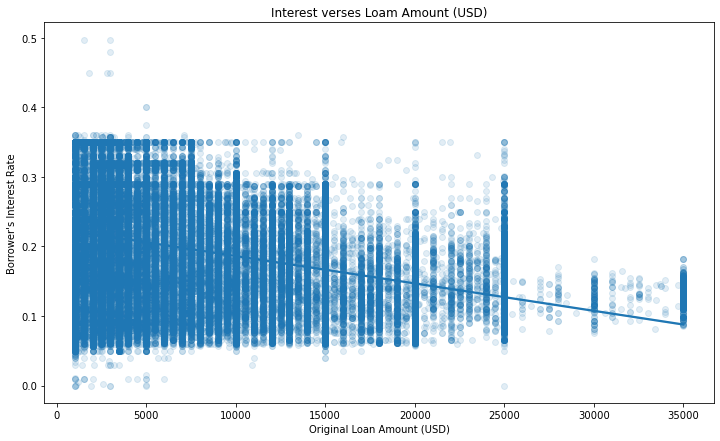

In [38]:
# Comparing the loan and the interest
plt.figure(figsize=(12,7))
sb.regplot(data=data,x='loanoriginalamount',y='borrowerrate',scatter_kws={'alpha':1/8},x_jitter=0.4)
plt.xlabel('Original Loan Amount (USD)')
plt.ylabel('Borrower\'s Interest Rate')
plt.title('Interest verses Loam Amount (USD)');

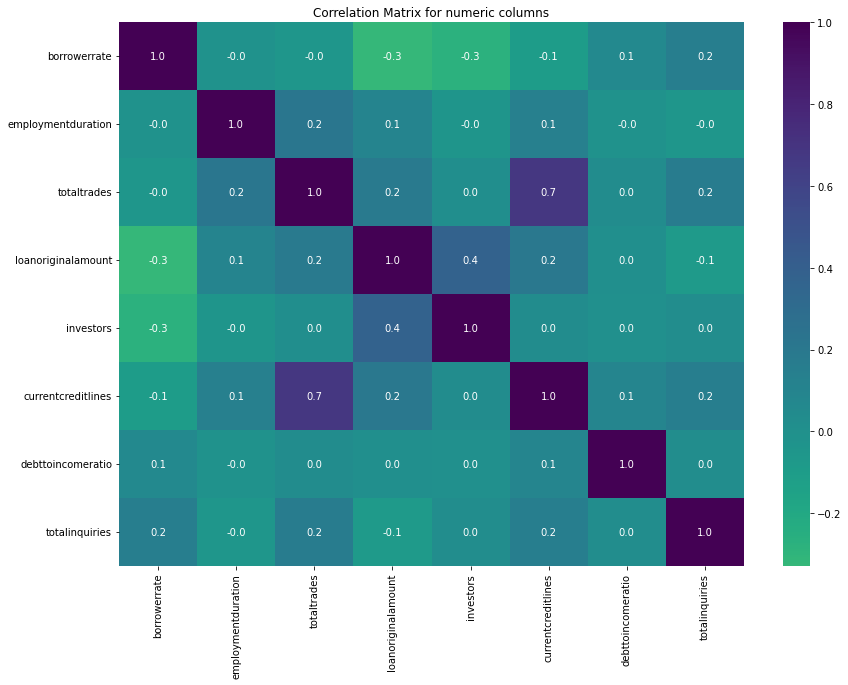

In [39]:
#plotting a heatmap to show correlation in the numeric features
plt.figure(figsize = (14, 10))
sb.heatmap(data[num_columns].corr(), annot = True, fmt = '.1f',
           cmap = 'viridis_r', center = 0)
plt.title('Correlation Matrix for numeric columns') 
plt.margins(x = 0.5, y= 0.3)
plt.show()

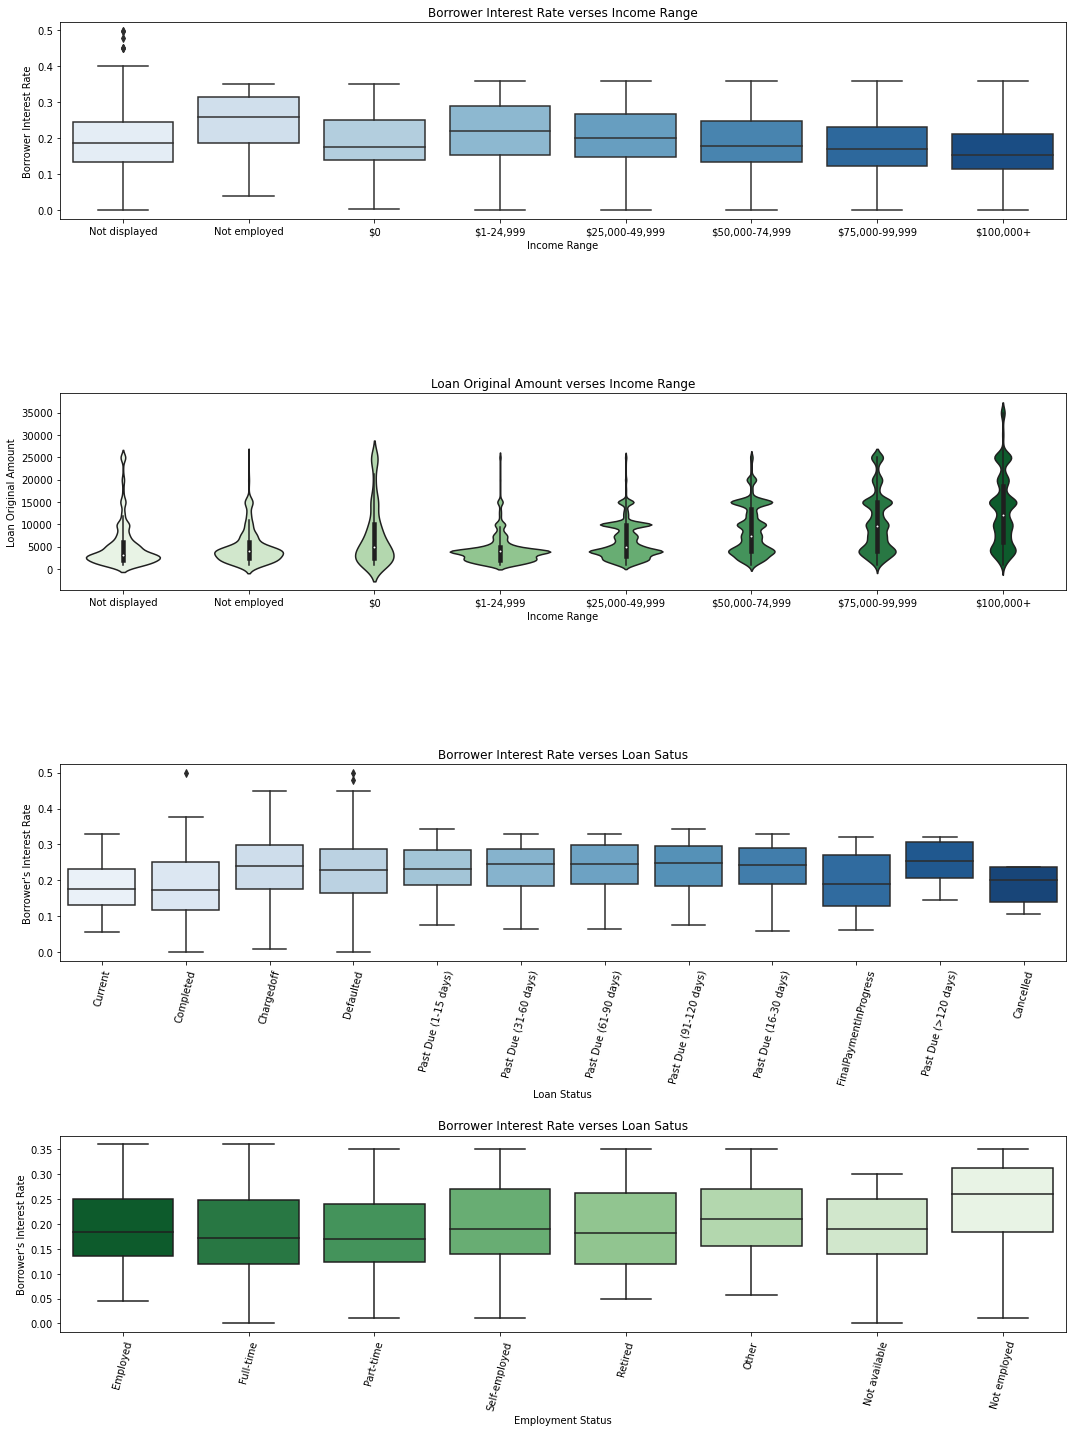

In [40]:
# Plotting boxplots/violin to help understand the relationship between the target variable (borrowerrate) and other features.
plt.figure(figsize = (15, 20))
plt.subplot(4,1,1)           
sb.boxplot(data=data,y='borrowerrate',x='incomerange',palette='Blues',order=ordered);
plt.xlabel('Income Range');
plt.ylabel('Borrower Interest Rate');
plt.title('Borrower Interest Rate verses Income Range');

plt.subplot(4,1,2)           
sb.violinplot(data=data,y='loanoriginalamount',x='incomerange',palette='Greens',order=ordered);
plt.xlabel('Income Range');
plt.ylabel('Loan Original Amount');
plt.title('Loan Original Amount verses Income Range');

plt.subplot(4,1,3) 
status_order=data.loanstatus.value_counts().index
sb.boxplot(data=data,y='borrowerrate',x='loanstatus',palette='Blues',order=status_order);
plt.xlabel('Loan Status');
plt.ylabel('Borrower\'s Interest Rate')
plt.xticks(rotation=75)
plt.title('Borrower Interest Rate verses Loan Satus');

plt.subplot(4,1,4)
emp_order=['Employed','Full-time','Part-time','Self-employed','Retired','Other','Not available','Not employed']
sb.boxplot(data=data,y='borrowerrate',x='employmentstatus',palette='Greens_r',order=emp_order);
plt.xlabel('Employment Status');
plt.ylabel('Borrower\'s Interest Rate')
plt.xticks(rotation=75)
plt.title('Borrower Interest Rate verses Loan Satus');
plt.tight_layout(h_pad=2)

### Insights from Bivariate Analysis.
+ **(borrowerrate vs loanoriginalamount)**- It appears that as the loan amount increases the numbers of borrowers decreases. It is also clear that the large loan amounts (typically above \\$25,000) have less than 0.2 interest rates. Even so, there are still more loans less than \\$25000 that have interest below 0.2 too. A closer look by checking other features may help us know why the trend is so. Again from the box plot, we can see the same trend especially with th median values for interest in each category.
+ **(heatmap-especially in relation to interest)**- There seem to be a positive corelation between the currentcreditlines and the totaltrades. When looking at the borrowerrate, we find that the loan originalamount and investors columns have a negative corelation meaning the more the orignal amount or investors the less the borrower interest rate. 
+ **(borrowerrate vrs incomerange)** - The \\$0 class seem to have a lower interest rate. This could be because they may  be volunteers or employees working under probation. However from \\$1 to \\$100,000+, the interest rate on average has a decreasing trend. This could be because the higher the salary the higher the chance for gtting bigger loan amounts which we realised attract smaller interest rates.
+ **(loanoriginalamount verses incomerange)** - The higher the average salary/income, the higher the chance for getting huge loan amount. This is interesting despite the fact that **target variable is not used in the analysis in this plot**
+ **(borrowerrate verses loanstatus)** - It appears that those who currently are paying loan, those that have completed and those in the final progress of paying have lower interest rates as compared to those that are past the due dates. 
+ **(borrowerrate verses employmentstatus)** - It appears that those who are employed (full time and part time and retired) enjoy on average lower rates (below 0.2) as compared to those not employed and the self employed. 

## Multivariate Exploration

> Here 3 or more features are used to create plots to investigate the data even
further.

### Question 4: How does features in Question 3 relate with each other? What about the relationship between the number of investors with the target feature (borrowerrate)

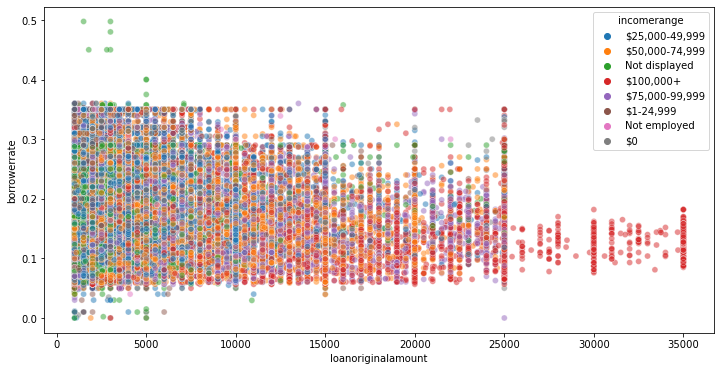

In [41]:
# Check interest and loan amount
plt.figure(figsize=(12,6))
sb.scatterplot(data=data,x='loanoriginalamount',y='borrowerrate',hue='incomerange',alpha=0.5);

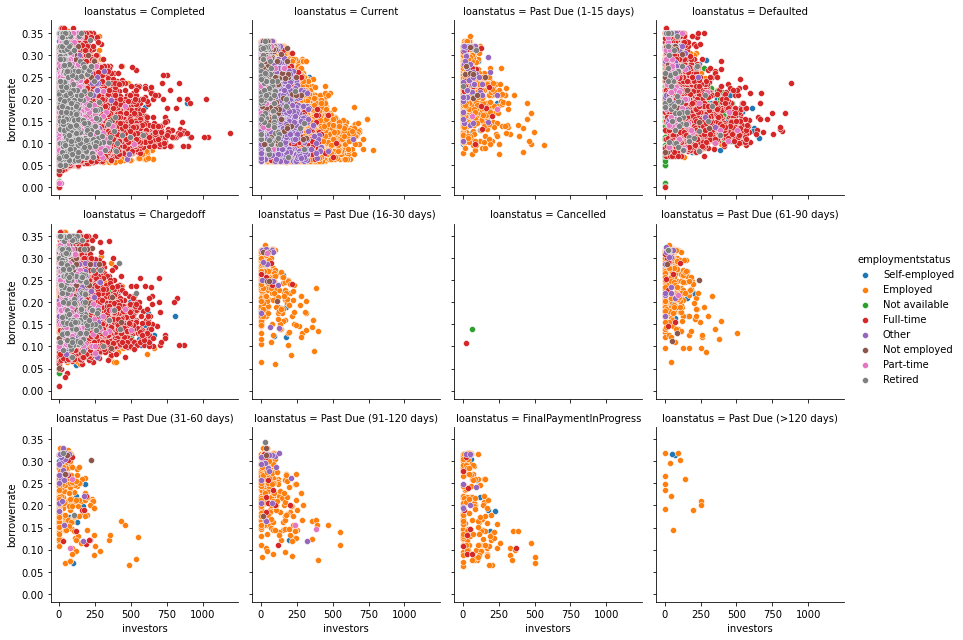

In [42]:
# Ploting a facetgrid to show the relationship between 4 important features in the dataset
g=sb.FacetGrid(data=data,col='loanstatus',col_wrap=4,hue='employmentstatus',margin_titles=False)
g.map(sb.scatterplot,'investors','borrowerrate')
g.add_legend();

### Insights from the Multivariate Analysis
* **(borrowerrate vs originalloanamount in respect to incomerange)**- The more the amount one earns, the higher the chance of getting a huge amount of loan. 
* **(borrower vs investors in respect to loanstatus and employmentstatus)** - It appears that as the number of investors increase, the interest rate goes down. It is also clear that very few people who are employed full time have their loan status past certain due time. Again it can be noted that those that have loan status past due date, majority have  less than 500 investors. Again it is evident that very few of the retired class of employment status have their loan status past due dates just like the full time employees. 

## Conclusions
+ Most of the features were normaly distributed showing a slight positive skew.
+ From the analysis done, there were no strong correlation between the features, however, there was seen some interesting trends such as:
  * The more the loan amount the lower the interest rate
  * The more the salary/income the higher the chance of getting a high amount of loan.
  * Those who are full time employed were more likely to complete paying their loan in time and hence appeared to have more high amount loans.
  * The more the investors the more likely a loan is to be paid on time.
#### Limitation
+ California had most of the borrowers, however futher investigation of comparing number of borrowers from each state with the total population in each state was required in order to give us a good picture of which state has high number of borrowers. This could only be done with data from USA Population. 
